In [1]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt   # 시각화 도와주는 패키지
import json   as j 

# 
import seaborn as sns 
import folium as f

import warnings
warnings.filterwarnings('ignore')

print('numpy   version , ' , np.__version__)
print('pandnas version , ' , pd.__version__)

numpy   version ,  1.24.3
pandnas version ,  1.5.3


In [2]:
%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False    
    
import warnings
warnings.filterwarnings(action='ignore')  

In [4]:
mpgFrm = pd.read_csv('../../data/auto-mpg.csv' , header=None)
mpgFrm.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
# mpgFrm.columns
mpgFrm.columns = ['mpg','cyl', 'displ','horsepower', 'weight',
                  'acc','model year', 'origin','model']


In [13]:
mpgFrm.head()


,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
print('pie chart - ')
# mpgFrm['origin'].unique()
# mpgFrm.describe()
mpgFrm['cnt'] = 1
mpgFrm.head()

pie chart - 


,mpg,cyl,displ,horsepower,weight,acc,model year,origin,model,cnt
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1


In [26]:
print('국가별 차량의 총합 - ')
grpFrm= mpgFrm.groupby('origin').sum()      # => 새로운 프레임 형성 => group
print('index - ',grpFrm.index)
print('columns - ', grpFrm.columns)

국가별 차량의 총합 - 
index -  Int64Index([1, 2, 3], dtype='int64', name='origin')
columns -  Index(['mpg', 'cyl', 'displ', 'weight', 'acc', 'model year', 'cnt'], dtype='object')


In [28]:
grpFrm.index = ['미국', '대한민국', '일본']     # rename으로도 가능
grpFrm

,mpg,cyl,displ,weight,acc,model year,cnt
미국,5000.8,1556,61229.5,837121.0,3743.4,18827,249
대한민국,1952.4,291,7640.0,169631.0,1175.1,5307,70
일본,2405.6,324,8114.0,175477.0,1277.6,6118,79


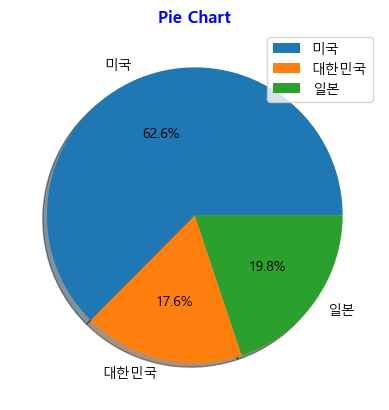

In [37]:
# 시각화
plt.figure()

# cnt로 파이차트 생성, label 부여, 그림자, 비율로 형식 지정(% %)안에...
plt.pie(grpFrm['cnt'] , labels = grpFrm.index,
         shadow=True,
         autopct= '%1.1f%%')  

plt.title('Pie Chart', weight= 'bold', color = 'blue')  # 제목
plt.legend(loc = 'best')    # 범례
plt.show()
plt.close()

In [38]:
titanicFrm = sns.load_dataset('titanic')
titanicFrm.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
print('선실별 승객 수의 비율(Pie)을 시각화 한다면')
# titanicFrm.groupby('pclass').sum()
titanicFrm['pclass'].value_counts()
print('index - ', titanicFrm['pclass'].value_counts().index)
print('value - ', titanicFrm['pclass'].value_counts().values)

선실별 승객 수의 비율(Pie)을 시각화 한다면
index -  Int64Index([3, 1, 2], dtype='int64')
value -  [491 216 184]


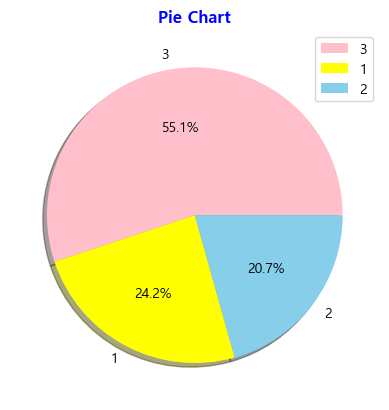

In [46]:
# 시각화
plt.figure()

# cnt로 파이차트 생성, label 부여, 그림자, 비율로 형식 지정(% %)안에...
plt.pie(titanicFrm['pclass'].value_counts().values ,
         labels = titanicFrm['pclass'].value_counts().index,
         shadow = True,
         autopct =  '%1.1f%%',
         colors=['pink','yellow', 'skyblue'])  

plt.title('Pie Chart', weight= 'bold', color = 'blue')  # 제목
plt.legend(loc = 'best')    # 범례
plt.show()
plt.close()

sns varplot
- (bar chart 와 비슷하지만 조금 더 편한 기능 제공)
- sns.xxxx()

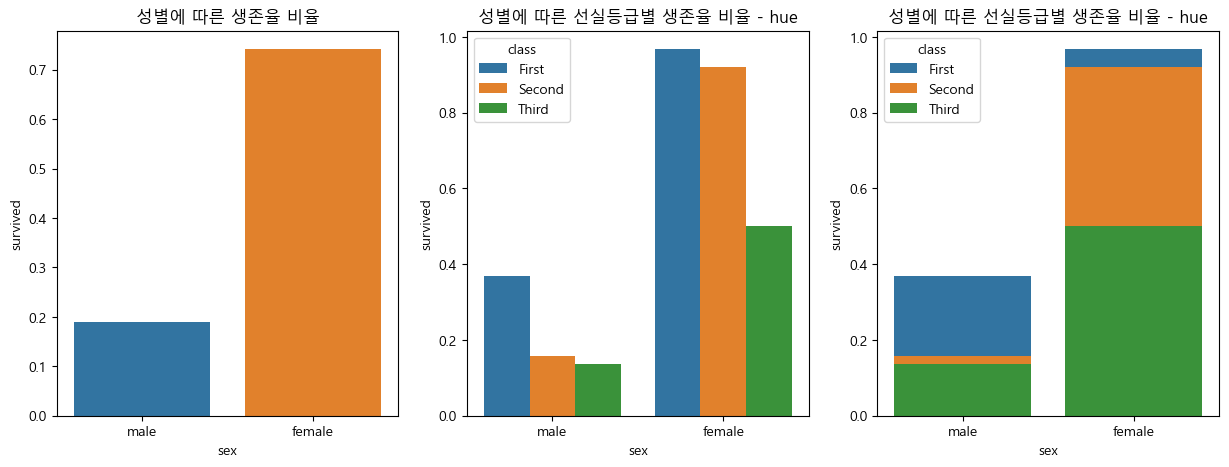

In [80]:
# 시각화
fig = plt.figure(figsize = (15, 5))

# 3개 생성
ax01 = fig.add_subplot(1,3,1) # 1 행 3열의 첫번째
ax01.set_title('성별에 따른 생존율 비율')   
sns.barplot(ax = ax01, data=titanicFrm, x = 'sex',y='survived', ci=None)
            # 중간 선 : 데이터의 신뢰도 보장 (ci = None 하면 사라짐)
            # hue : 멀티차트 만들 때 비율
ax02 = fig.add_subplot(1,3,2)   # 1 행 3열의 두번째
ax02.set_title('성별에 따른 선실등급별 생존율 비율 - hue')
sns.barplot(ax = ax02, data=titanicFrm, 
            x = 'sex',y='survived', 
            ci=None, hue='class')
            

ax03 = fig.add_subplot(1,3,3)   # 1 행 3열의 세번째
ax03.set_title('성별에 따른 선실등급별 생존율 비율 - hue')
sns.barplot(ax = ax03, data=titanicFrm, 
            x = 'sex',y='survived', 
            ci=None, hue='class',
            dodge=False)

plt.show()
plt.close()


In [72]:
print('성별에 따른 생존율 비율')
titanicFrm.groupby('sex')['survived'].mean()

성별에 따른 생존율 비율


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [73]:
print('성별에 따른 선실등급별 생존율 비율')
titanicFrm.groupby(['sex', 'pclass'])['survived'].mean()

성별에 따른 선실등급별 생존율 비율


sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [74]:
tipFrm = sns.load_dataset('tips')
tipFrm.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
print('요일별 평균 팁, 요일별 매출 평균')
tipFrm.groupby('day')['tip','total_bill'].mean()


요일별 평균 팁, 요일별 매출 평균


,tip,total_bill
day,,
Thur,2.771452,17.682742
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000


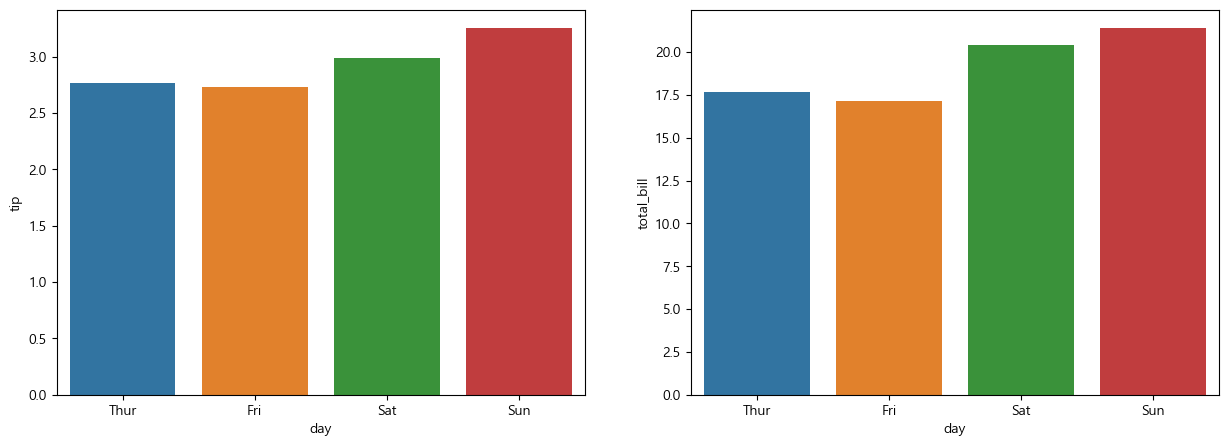

In [78]:
# 시각화
fig = plt.figure(figsize = (15, 5))

ax01 = fig.add_subplot(1,2,1)
sns.barplot(ax = ax01, data = tipFrm,
            x = 'day' , y = 'tip', ci = None)
ax02 = fig.add_subplot(1,2,2)
sns.barplot(ax = ax02, data = tipFrm,
            x = 'day' , y = 'total_bill', ci = None)
plt.show()
plt.close()


In [284]:
tipFrm.groupby('day')['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

- countplot (빈도수 = value_count 확인용)

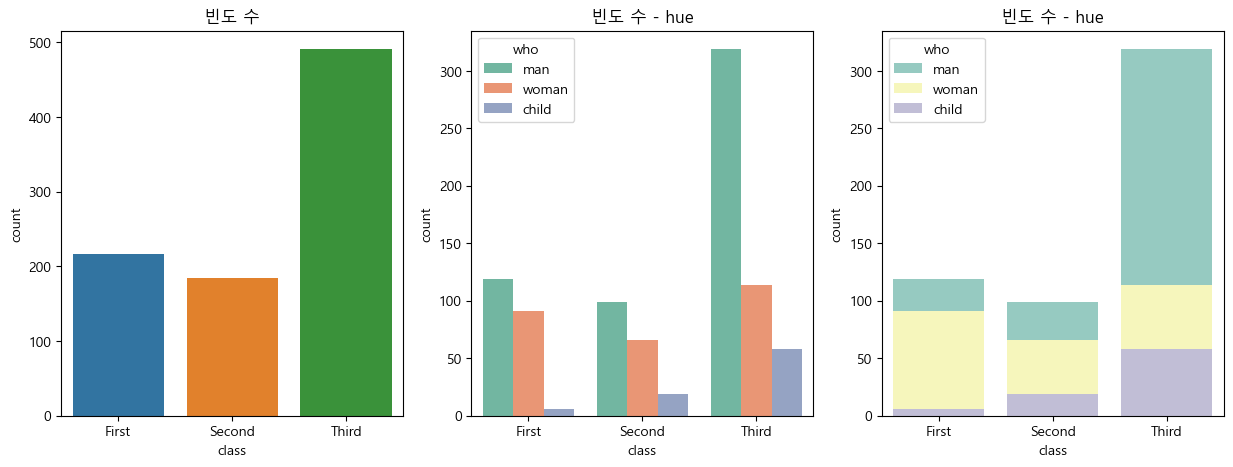

In [94]:
# 시각화
fig = plt.figure(figsize = (15, 5))

# 3개 생성
ax01 = fig.add_subplot(1,3,1) # 1 행 3열의 첫번째
# 성별에 따른 생존율 
ax01.set_title('빈도 수')   
# 성별에 따른 생존률
# x축만 생성해줌
sns.countplot(ax = ax01, data=titanicFrm, x = 'class')

ax02 = fig.add_subplot(1,3,2)   # 1 행 3열의 두번째
ax02.set_title('빈도 수 - hue')
sns.countplot(ax = ax02, data=titanicFrm, x = 'class'
              , hue='who', palette= 'Set2')
# sns.barplot(ax = ax02, data=titanicFrm, 
#             x = 'sex',y='survived', 
#             ci=None, hue='class')
            

ax03 = fig.add_subplot(1,3,3)   # 1 행 3열의 세번째
ax03.set_title('빈도 수 - hue')
sns.countplot(ax = ax03, data=titanicFrm, x = 'class'
              , hue='who', palette= 'Set3', dodge= False)
# sns.barplot(ax = ax03, data=titanicFrm, 
#             x = 'sex',y='survived', 
#             ci=None, hue='class',
#             dodge=False)

plt.show()
plt.close()


In [85]:
titanicFrm['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

요일별로 팁을 준 빈도를 시각화


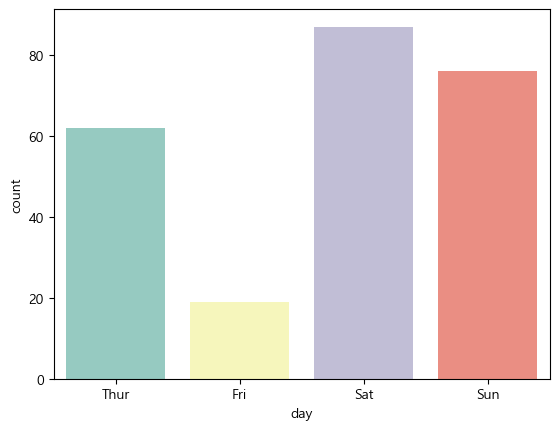

In [99]:
print('요일별로 팁을 준 빈도를 시각화')
# tipFrm['day'].value_counts()

plt.figure()

sns.countplot(data = tipFrm, x = 'day', palette='Set3')

plt.show()
plt.close()

- stripplot : 모든 데이터를 점으로 시각화

요일별로 매출을 시각화 - 


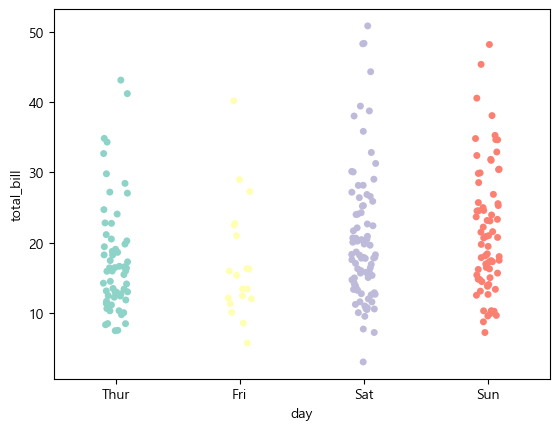

In [103]:
print('요일별로 매출을 시각화 - ')
plt.figure()

sns.stripplot(data = tipFrm, x = 'day', y = 'total_bill' ,palette='Set3', jitter= True)

plt.show()
plt.close()


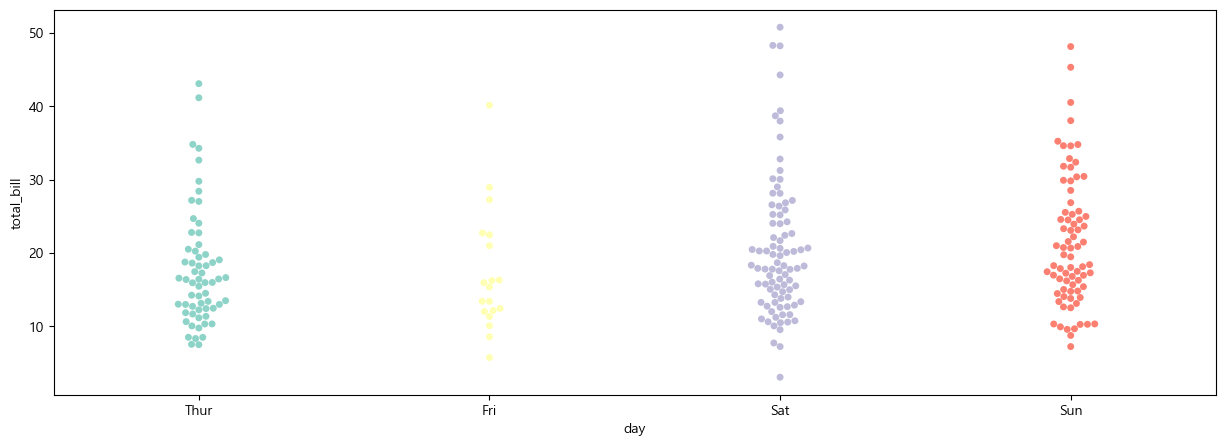

In [285]:
plt.figure(figsize = (15, 5))

sns.swarmplot(data = tipFrm, x = 'day', y = 'total_bill' ,palette='Set3')

plt.show()
plt.close()

타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고
class 별 나이분포를 시각화 - strip , swarm


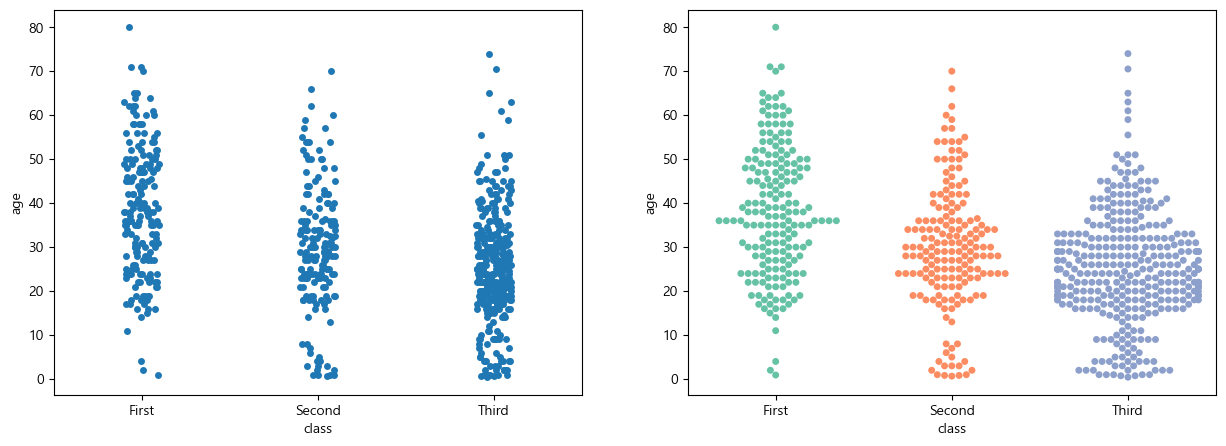

In [286]:
print('타이타닉을 이용해서 서브플롯으로 2개의 영역을 만들고')
print('class 별 나이분포를 시각화 - strip , swarm')
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
sns.stripplot(ax = ax01 , data = titanicFrm , x = 'class' , y='age' , jitter = True )

ax02 = fig.add_subplot(1,2,2)
sns.swarmplot(ax = ax02, data = titanicFrm, x= 'class', y='age',palette='Set2')

plt.show()
plt.close()


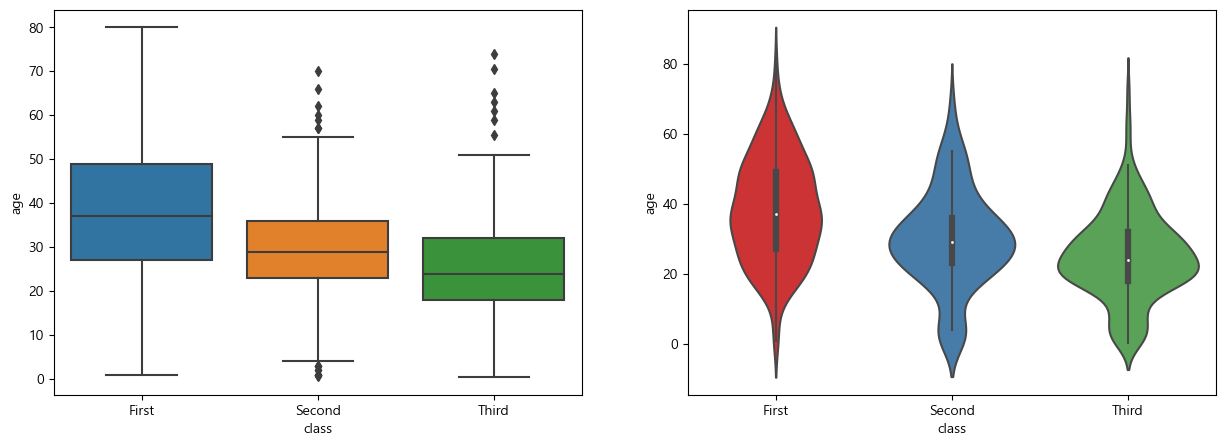

In [120]:
fig = plt.figure(figsize=(15,5))

ax01 = fig.add_subplot(1,2,1)
sns.boxplot(ax = ax01, data = titanicFrm, x= 'class', y='age')

ax02 = fig.add_subplot(1,2,2)
sns.violinplot(ax = ax02, data = titanicFrm, x= 'class', y='age', palette='Set1')
# 세로 선의 꼭대기가 max, 맨 아래가 min, 선을 넘어간 도형의 범위는 이상치로 볼 수 있다.

plt.show()
plt.close()


- heatmap
  - 데이터가 table 형식을 가져야 함 (일반적인 프레임을 시각화 할 수 없다)

In [137]:
print('성별에 따른 선실등급의 인원 수 합을 구한다면 - pivot')
titanicFrm['cnt'] = 1
table = titanicFrm.pivot_table(index = 'sex', columns='class', values='cnt', aggfunc=np.sum)

성별에 따른 선실등급의 인원 수 합을 구한다면 - pivot


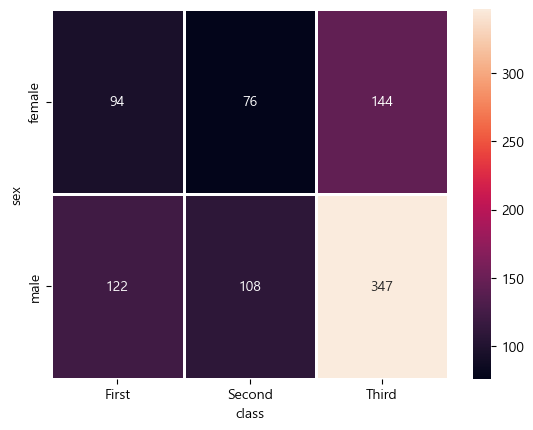

In [142]:
# heatmap 하기 위해서는 (위 table을 그대로 map으로 만들기 때문에) index가 rabel 값이어야 함
sns.heatmap(table, annot = True, fmt = 'd', linewidth = 1, cbar = True)

plt.show()
plt.close()

In [287]:
flightFrm = sns.load_dataset('flights')
flightFrm

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [148]:
print('인덱스를 월, 열을 년도로 하는 히드맵을 작성한다면')
table = flightFrm.pivot_table(index = 'month',
                              columns='year',
                              values='passengers' )
table


인덱스를 월, 열을 년도로 하는 히드맵을 작성한다면


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


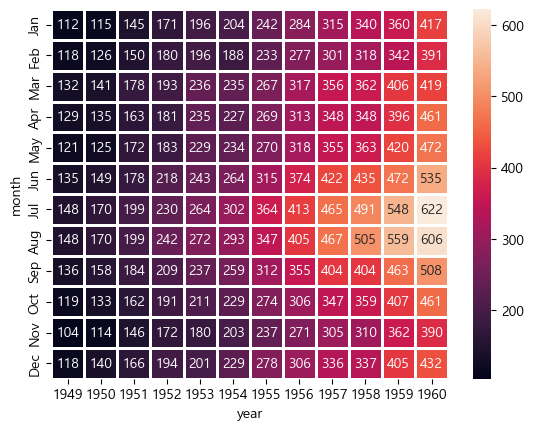

In [288]:
sns.heatmap(table , annot = True , fmt = 'd' , linewidth = 1 , cbar = True)

plt.show()
plt.close()

#### pairplot() : 상관관계를 시각화하는 함수
- 상관분석 : 두 확률변수간의 관계를 지수로 표현하는 것
- 상관계수(관련성의 정도) : -1 ~ 1 (1에 가까울수록 양의 상관관계 갖는다고 표현함)

In [153]:
irisFrm = sns.load_dataset('iris')
irisFrm.info()
# 타겟이 범주이면 분류로 볼 수 있는데, 분류가 0 or 1 이라면 2진 분류라고 한다
# 다중분류
# 상관분석

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


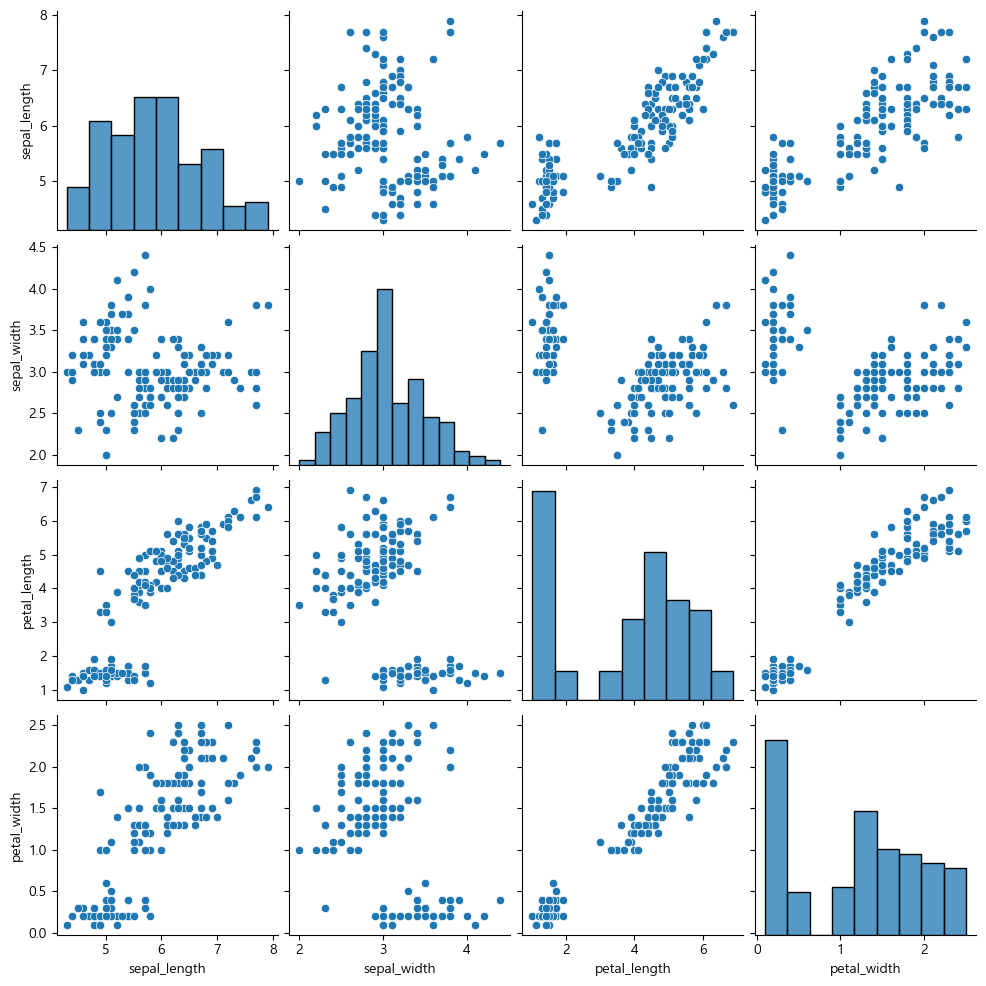

In [154]:
sns.pairplot(irisFrm)

plt.show()
plt.close()

# 대각선 중앙의 그래프는 중요하지 않고, 그래프를 기점으로 왼쪽 또는 오른쪽 그래프를 사용한다.


- 지도 시각화

In [155]:
import folium as g

In [164]:
map = g.Map(location= [35.104930154638694 , 129.01876172664956 ],
      zoom_start = 15 )

g.Marker([35.104930154638694 , 129.01876172664956],
         popup='동아대학교').add_to(map)

g.CircleMarker([35.104930154638694 , 129.01876172664956]
               ,radius = 50
               ,color = 'skyblue').add_to(map)

map

In [167]:
seoulUniFrm = pd.read_excel('../../data/서울지역 대학교 위치.xlsx',
                            index_col = 0)
seoulUniFrm.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [190]:
map = g.Map(location= [37.565382340480355, 126.97721517779577  ],
      zoom_start = 12 )
# map
for name in seoulUniFrm.index :
    # print(name)
    lat = seoulUniFrm.loc[name, '위도']
    lng = seoulUniFrm.loc[name, '경도']
    # print(lat, lng)     # 위도, 경도 feature값 확인

    g.Marker([lat , lng],
         popup=name,
         icon= g.Icon(color='pink')).add_to(map)
    
    g.CircleMarker([lat , lng]
               ,radius = 15
               ,color = 'blue'
               ,popup= name
               , fill_color = 'red').add_to(map)

map

In [191]:
seoulUniFrm.isnull().sum()

위도    0
경도    0
dtype: int64

In [248]:
schoolFrm = pd.read_excel('../../data/elem_school_folium.xlsx')
schoolFrm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11873 entries, 0 to 11872
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교ID      11873 non-null  object 
 1   학교명       11873 non-null  object 
 2   학교급구분     11873 non-null  object 
 3   설립일자      11873 non-null  object 
 4   설립형태      11873 non-null  object 
 5   본교분교구분    11873 non-null  object 
 6   운영상태      11873 non-null  object 
 7   소재지지번주소   11873 non-null  object 
 8   소재지도로명주소  11872 non-null  object 
 9   시도교육청코드   11873 non-null  int64  
 10  시도교육청명    11873 non-null  object 
 11  교육지원청코드   11873 non-null  int64  
 12  교육지원청명    11873 non-null  object 
 13  생성일자      11873 non-null  object 
 14  변경일자      11873 non-null  object 
 15  위도        11873 non-null  float64
 16  경도        11873 non-null  float64
 17  데이터기준일자   11873 non-null  object 
 18  제공기관코드    11873 non-null  int64  
 19  제공기관명     11873 non-null  object 
dtypes: float64(2), int64(3), obj

In [249]:
schoolFrm.isnull().sum()

학교ID        0
학교명         0
학교급구분       0
설립일자        0
설립형태        0
본교분교구분      0
운영상태        0
소재지지번주소     0
소재지도로명주소    1
시도교육청코드     0
시도교육청명      0
교육지원청코드     0
교육지원청명      0
생성일자        0
변경일자        0
위도          0
경도          0
데이터기준일자     0
제공기관코드      0
제공기관명       0
dtype: int64

In [250]:
schoolFrm.columns

Index(['학교ID', '학교명', '학교급구분', '설립일자', '설립형태', '본교분교구분', '운영상태', '소재지지번주소',
       '소재지도로명주소', '시도교육청코드', '시도교육청명', '교육지원청코드', '교육지원청명', '생성일자', '변경일자',
       '위도', '경도', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [251]:
schoolFrm['학교급구분'].unique()

array(['초등학교', '중학교', '고등학교'], dtype=object)

In [252]:
schoolFrm['시도교육청명'].unique()

array(['서울특별시교육청', '부산광역시교육청', '대구광역시교육청', '인천광역시교육청', '광주광역시교육청',
       '대전광역시교육청', '울산광역시교육청', '경기도교육청', '강원도교육청', '충청북도교육청', '충청남도교육청',
       '세종특별자치시교육청', '전라북도교육청', '전라남도교육청', '경상북도교육청', '경상남도교육청',
       '제주특별자치도교육청'], dtype=object)

In [263]:
print('소재지가 부산지역인 초등학교를 시각화 - ')
# schoolFrm['소재지도로명주소'].startswith('서울')    # => series 에서 startswith 사용 못함(문자열이 아니므로)
# schoolFrm['소재지도로명주소'].str.startswith('서울')    # => str로 변환하면 가능 (bool index)
print('학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset')
# schoolFrm.head()
subset = schoolFrm[['학교명','학교급구분', '소재지도로명주소', '위도', '경도']]
subset

소재지가 부산지역인 초등학교를 시각화 - 
학교명, 학교급구분, 소재지도로명주소, 위도, 경도 - subset


,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11868,평택새빛초등학교,초등학교,경기도 평택시 신촌2로 33(칠원동),37.024922,127.105114
11869,마장초등학교,초등학교,경기도 이천시 마장면 오천로 130,37.246497,127.358475
11870,인천중산초등학교,초등학교,인천광역시 중구 두미포로 100,37.494695,126.565599
11871,인천중산중학교,중학교,인천광역시 중구 두미포로 189,37.498222,126.571277


In [277]:
print('1.소재지가 부산지역인 초등학교만 추출 - 결측값 확인(제거)')
condition = (subset['학교급구분'] =='초등학교') & (subset['소재지도로명주소'].str.startswith('부산광역시 서구')
            #  & (subset['소재지도로명주소'].str.contains('서구'))
            )
subset = subset[condition]


1.소재지가 부산지역인 초등학교만 추출 - 결측값 확인(제거)


In [278]:
subset

,학교급구분,소재지도로명주소,위도,경도
학교명,,,,
토성초등학교,초등학교,부산광역시 서구 구덕로134번길 45,35.098643,129.021351
부민초등학교,초등학교,부산광역시 서구 고운들로 12,35.105970,129.019922
화랑초등학교,초등학교,부산광역시 서구 대영로86번길 56,35.108571,129.021064
남부민초등학교,초등학교,부산광역시 서구 천마로 153,35.089418,129.023334
동신초등학교,초등학교,부산광역시 서구 대영로85번길 81-19,35.113860,129.017590
구덕초등학교,초등학교,부산광역시 서구 보수대로 312,35.120415,129.012541
대신초등학교,초등학교,부산광역시 서구 대신로 63,35.116181,129.011782
아미초등학교,초등학교,부산광역시 서구 해돋이로 241,35.098738,129.016068
송도초등학교,초등학교,부산광역시 서구 충무대로 25,35.078240,129.015594


In [279]:
subset.set_index('학교명', inplace=True)

KeyError: "None of ['학교명'] are in the columns"

In [267]:
subset


,학교급구분,소재지도로명주소,위도,경도
학교명,,,,
토성초등학교,초등학교,부산광역시 서구 구덕로134번길 45,35.098643,129.021351
부민초등학교,초등학교,부산광역시 서구 고운들로 12,35.105970,129.019922
화랑초등학교,초등학교,부산광역시 서구 대영로86번길 56,35.108571,129.021064
남부민초등학교,초등학교,부산광역시 서구 천마로 153,35.089418,129.023334
동신초등학교,초등학교,부산광역시 서구 대영로85번길 81-19,35.113860,129.017590
구덕초등학교,초등학교,부산광역시 서구 보수대로 312,35.120415,129.012541
대신초등학교,초등학교,부산광역시 서구 대신로 63,35.116181,129.011782
아미초등학교,초등학교,부산광역시 서구 해돋이로 241,35.098738,129.016068
송도초등학교,초등학교,부산광역시 서구 충무대로 25,35.078240,129.015594


In [280]:
subset.index

Index(['토성초등학교', '부민초등학교', '화랑초등학교', '남부민초등학교', '동신초등학교', '구덕초등학교', '대신초등학교',
       '아미초등학교', '송도초등학교', '천마초등학교', '부산알로이시오초등학교'],
      dtype='object', name='학교명')

In [281]:
print('2. 소재지가 부산지역의 서구에 있는 초등학교만 추출 - 결측값 확인(제거)')
subset = subset.dropna()
# subset.isnull().sum()

2. 소재지가 부산지역의 서구에 있는 초등학교만 추출 - 결측값 확인(제거)


In [276]:
print('학교명을 인덱스로 만들어서 지도로 시각화 -')
map = g.Map(location= [35.1133912509959 , 129.01814245590677],
      zoom_start = 15 )
# map
for name in subset.index :
    # print(name)
    lat = subset.loc[name, '위도']
    lng = subset.loc[name, '경도']
    print(lat, lng)     # 위도, 경도 feature값 확인
    try :
        g.Marker([lat , lng],
            popup=name,
            icon= g.Icon(color='pink')).add_to(map)
    except Exception as e :
        print('위도, 경도 예외 발생')
map

학교명을 인덱스로 만들어서 지도로 시각화 -
35.098643 129.0213507
35.1059701477 129.019922377
35.1085708 129.0210643
35.0894180942 129.023333846
35.1138600455 129.017590305
35.1204146238 129.0125412
35.11618072 129.011782098
35.0987383903 129.016068386
35.0782403 129.0155937
35.0816591587 129.0182257
35.0833163179 129.01635089
35.0852697 128.900408315
35.1148435 128.886391833
35.1953628436 128.89645831
35.2202735 128.9387833
35.2141208423 128.980252716
35.2161016788 128.955307884
35.1756477806 128.955870586
35.1502024465 128.945324817
35.0819680032 128.878586082
35.0523462742 128.831268714
35.0838734245 128.910972022
35.0850378 128.8810987
35.1514737699 128.8371146
35.0802977112 128.907064726
35.1094701 128.922354
35.1022589653 128.9241427
35.0952331339 128.9207165


In [282]:
subset['소재지도로명주소'].str.contains('서구')

학교명
토성초등학교         True
부민초등학교         True
화랑초등학교         True
남부민초등학교        True
동신초등학교         True
구덕초등학교         True
대신초등학교         True
아미초등학교         True
송도초등학교         True
천마초등학교         True
부산알로이시오초등학교    True
Name: 소재지도로명주소, dtype: bool

In [283]:
subset['소재지도로명주소'][0].split()[1]

'서구'